In [1]:
import numpy as np
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt

In [2]:
# 连接数据库
client = MongoClient(host='127.0.0.1',port=27017)
db = client.get_database("lianjia")
zufang_col = db.get_collection("zufang_sz")
data = zufang_col.find()

In [3]:
# 导入数据到dataframe
df = pd.DataFrame(list(data))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23710 entries, 0 to 23709
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   _id                   23710 non-null  object
 1   dataDistributionType  23710 non-null  int64 
 2   district              23710 non-null  object
 3   microdistrict         23710 non-null  object
 4   community             18218 non-null  object
 5   area                  23710 non-null  int64 
 6   orientation           18218 non-null  object
 7   houseType             23710 non-null  object
 8   tags                  23710 non-null  object
 9   title                 23710 non-null  object
 10  price                 23710 non-null  int64 
 11  city                  23710 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.2+ MB


In [4]:
# 数据备份
df2 = df.copy()
# 将无用字段去掉
df2 = df2.drop(columns=['_id','city'])
df2.sample(5)

,dataDistributionType,district,microdistrict,community,area,orientation,houseType,tags,title,price
7043,1,宝安区,西乡,NaN,20,NaN,1室0厅1卫,"[独栋公寓, 月租, 近地铁, 有阳台, 开放厨房, 押一付一]",独栋·壹时代公寓 后瑞店 单间1 开间,1640
3800,0,南山区,蛇口,招商桃花园,124,东南,3室2厅2卫,"[官方核验, 近地铁, 双卫生间]",整租·招商桃花园 3室2厅 东南,13000
8599,1,宝安区,新安,NaN,23,NaN,1室0厅1卫,"[独栋公寓, 月租, 拎包入住, 近地铁, 有阳台, 开放厨房]",独栋·大鱼·公寓 奕居店 地铁口200米单间 开间,1980
17498,0,宝安区,碧海,碧海富通城一期,112,南,3室1厅1卫,[官方核验],整租·碧海富通城一期 3室1厅 南,7000
18860,1,龙华区,观澜,NaN,25,NaN,1室0厅1卫,"[独栋公寓, 月租, 开放厨房, 押一付一]",独栋·佳寓 佳寓·深圳观澜汽车城店 白领公寓（东方禅意） 开间,1185


In [11]:
# 计算房源每平方米的租金，并添加到dataframe里作为新的一列
df2['perPrice'] = (df2['price'] / df2 ['area']).round(1)
df2.sample(5)

,dataDistributionType,district,microdistrict,community,area,orientation,houseType,tags,title,price,perPrice
2025,0,南山区,科技园,晶品居,14,东,4室1厅1卫,"[公寓, 月租, 精装, 随时看房]",合租·晶品居 4居室 东卧,2890,206.4
7959,1,宝安区,西乡,NaN,20,NaN,1室0厅1卫,"[新上, 独栋公寓, 月租, 近地铁, 有阳台, 开放厨房]",独栋·禧邻公寓 南昌店 免管理费上下铺大单间 开间,1500,75.0
12464,0,龙岗区,布吉街,花语岸,85,东南,3室1厅1卫,"[公寓, 月租, 近地铁, 精装, 随时看房]",整租·花语岸 3室1厅 东南,4830,56.8
15273,0,南山区,白石洲,祥祺花园,12,北,4室1厅2卫,"[公寓, 月租, 近地铁, 精装, 独立阳台, 随时看房]",合租·祥祺花园 4居室 北卧,2790,232.5
22864,1,龙岗区,坂田,NaN,26,NaN,1室0厅1卫,"[独栋公寓, 月租, 开放厨房]",独栋·乐窝公寓 1号楼 温馨大单间 开间,1450,55.8


In [16]:
# 计算每个地区的房源数量
# value_counts()  查询每个独特数值出现的次数统计

df2['district'].value_counts()

龙岗区     5919
南山区     5406
宝安区     4684
福田区     3801
龙华区     3339
光明区      202
盐田区      199
坪山区      106
大鹏新区      54
Name: district, dtype: int64

In [23]:
# 计算每个地区的平均房价

mean_price_per_region = df2.groupby(df2['district'])
mean_price_per_region['perPrice'].mean().sort_values()

district
光明区      44.512376
坪山区      52.078302
大鹏新区     55.122222
盐田区      75.731658
龙岗区      82.934651
宝安区      98.320581
龙华区      98.657293
南山区     153.583537
福田区     158.109050
Name: perPrice, dtype: float64

In [27]:
###  房屋大小对每平方米租金的影响如何
import seaborn as sns


In [41]:
def area_price_relation(data=df2):
    fig = plt.figure(dpi=100)
    g = sns.lineplot(x="area",
                     y='perPrice',
                     data=data[(data['area']<100)],
                     ci=None)
    g.set_xlabel('面积',fontweight='bold')
    g.set_ylabel('每平米均价',fontweight='bold')
    return g



In [42]:
plt.style.use('ggplot')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

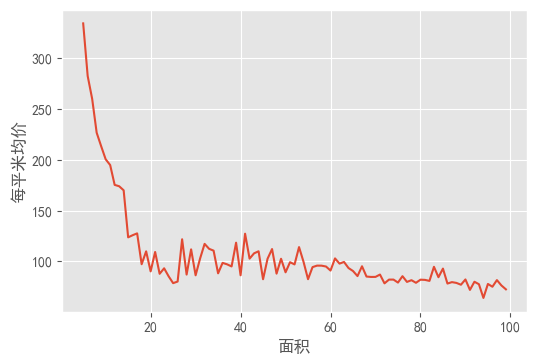

In [43]:
area_price_relation()

In [44]:
# 房源中公寓和个人房源占比
np.round(df2['dataDistributionType'].mean()*100,2)

23.16

In [58]:
# 精装和简装对房子价格的影响
from pyecharts.charts import Bar

df2['decorated'] = df2[df2['tags'].notna()]['tags'].str.contains('精装')    # 添加新字段 是否精装
decorated= df2[df2['decorated']==1]['perPrice'].mean()                      # 计算精装房子每平米均价
not_decorated = df2[df2['decorated']==0]['perPrice'].mean()                 # 计算简装房子每平米均价

print(decorated)
print(not_decorated)






nan
nan


In [57]:
bar = Bar()
bar.add_yaxis("平均租金" [int(np.round(decorated, 0)), int(np.round(not_decorated, 0))])
bar.add_xaxis(["精装","简装"])
bar.set_global_opts(title_opts=opts.TitleOpts(title="精装与简装对每平方租金的影响"))
bar.render('decorated_and_not_decorated.html')

ValueError: cannot convert float NaN to integer